In [26]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#sklearn - Machine Learning Package
import sklearn.model_selection as modsel
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble.partial_dependence import plot_partial_dependence

from sklearn.model_selection import GridSearchCV

import cPickle as pickle

### Load & Inspect Data

In [2]:
filename = 'block_1.csv'
DT = pd.read_csv(filename,na_values='?')

####
# Data Inspection
# - Total Number of Records and Features
# - Unique Feature Data Types
# - Presence of Null Entries
####

print('Dimensions: %s records x %s features.' % DT.shape)

print('Unique Feature Data Types: %s' % len(DT.dtypes.unique()))
for x in DT.dtypes.unique():
    print(' -> '+str(x))

null_idx = DT.isnull().any().values
null_idx = null_idx[null_idx==True]
print('')
print('NULL Entries: %s ' % len(null_idx))

if len(null_idx>0):
    DT =DT.fillna(value = -1)
    print('NULL Entries Set To %s' % (-1))

#if(len(null_idx)>0):
#    for x in null_idx:
#        if(DT.iloc[:,x].isnull()):
#            print(' - ' + str(x) + ' has %s NULL entries' % len(DT[x].isnull()))
#del null_idx

print(DT.info())

Dimensions: 574913 records x 12 features.
Unique Feature Data Types: 3
 -> int64
 -> float64
 -> bool

NULL Entries: 7 
NULL Entries Set To -1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574913 entries, 0 to 574912
Data columns (total 12 columns):
id_1            574913 non-null int64
id_2            574913 non-null int64
cmp_fname_c1    574913 non-null float64
cmp_fname_c2    574913 non-null float64
cmp_lname_c1    574913 non-null float64
cmp_lname_c2    574913 non-null float64
cmp_sex         574913 non-null int64
cmp_bd          574913 non-null float64
cmp_bm          574913 non-null float64
cmp_by          574913 non-null float64
cmp_plz         574913 non-null float64
is_match        574913 non-null bool
dtypes: bool(1), float64(8), int64(3)
memory usage: 48.8 MB
None


### Create Training Sets

In [3]:
str_preds = DT.columns[2:-1]
str_output = 'is_match'

X= DT[str_preds]
y=DT[str_output]

### Model Parameters

In [4]:
param = {'learning_rate':[0.001,0.01,0.1],
            'max_depth':[2,3,4],
            'n_estimators':[50,100,150,200]}


#learning_rate = 0.1
#n_estimators = 100
#max_depth = 3

min_samples_split = 2
min_samples_leaf = 1
min_weight_fraction_leaf = 0
min_impurity_split = 1e-7
verbose = 1
warm_start = False
random_state = 123456
init = None
max_leaf_nodes = None 

#{‘deviance’, ‘exponential’}
loss = 'deviance'

#{'friedman_mse','mse','mae'}
criterion = 'friedman_mse'

# int: consider all features
# float: consider a percentage of features
# {'sqrt','log2','auto'}
# None
max_features = 'sqrt'

# if subsample < 1.0, results in stochastic gradient boosting
subsample = 0.8

# True, False, 'auto'
presort = 'auto'


### Instantiate Model & Grid Sweep 

In [12]:
model_gtb_class=GradientBoostingClassifier(loss=loss, 
                                           #learning_rate=learning_rate,
                                           #n_estimators=n_estimators, 
                                           subsample=subsample, 
                                           criterion=criterion,
                                           min_samples_split=min_samples_split, 
                                           min_samples_leaf=min_samples_leaf, 
                                           min_weight_fraction_leaf=min_weight_fraction_leaf, 
                                           #max_depth=max_depth, 
                                           min_impurity_split=min_impurity_split, 
                                           init=init,
                                           random_state=random_state, 
                                           max_features=max_features, 
                                           verbose=verbose, 
                                           max_leaf_nodes=max_leaf_nodes, 
                                           warm_start=warm_start, 
                                           presort=presort)

grid_CV = GridSearchCV(model_gtb_class, param)


### Run Sweep

In [14]:
#- Note: This takes a very long time. 
#- Comment these 2 lines before running.
grid_CV.fit(X, y)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.0469           0.0011            5.60s
         2           0.0470           0.0001            5.12s
         3           0.0459           0.0012            4.77s
         4           0.0447           0.0010            4.58s
         5           0.0440           0.0008            4.49s
         6           0.0427           0.0010            4.30s
         7           0.0424           0.0008            4.12s
         8           0.0412           0.0006            4.07s
         9           0.0408           0.0006            4.02s
        10           0.0404           0.0005            3.97s
        20           0.0363           0.0000            3.10s
        30           0.0342           0.0000            2.11s
        40           0.0322           0.0000            1.07s
        50           0.0319           0.0001            0.00s
      Iter       Train Loss      OOB Improve   Remaining Time 
      

         8           0.0412           0.0006           14.26s
         9           0.0408           0.0006           14.04s
        10           0.0404           0.0005           13.94s
        20           0.0363           0.0000           12.92s
        30           0.0341           0.0000           11.78s
        40           0.0320           0.0002           11.09s
        50           0.0318           0.0001           10.11s
        60           0.0301           0.0001            9.14s
        70           0.0290           0.0001            8.19s
        80           0.0277           0.0001            7.22s
        90           0.0270           0.0001            6.24s
       100           0.0260           0.0001            5.20s
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.0469           0.0011           17.13s
         2           0.0457           0.0015           16.06s
         3           0.0449           0.0008           16.24s
       

         8           0.0406           0.0007            5.46s
         9           0.0400           0.0007            5.27s
        10           0.0397           0.0006            5.19s
        20           0.0357           0.0001            3.94s
        30           0.0331           0.0003            2.60s
        40           0.0308           0.0002            1.25s
        50           0.0301           0.0001            0.00s
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.0461           0.0019           11.81s
         2           0.0449           0.0013           10.85s
         3           0.0439           0.0012           10.59s
         4           0.0427           0.0010           10.56s
         5           0.0420           0.0008           10.44s
         6           0.0409           0.0007           10.43s
         7           0.0408           0.0007           10.20s
         8           0.0396           0.0006           10.04s
       

         6           0.0409           0.0007           21.58s
         7           0.0408           0.0007           21.04s
         8           0.0396           0.0006           20.87s
         9           0.0392           0.0006           21.15s
        10           0.0388           0.0006           21.32s
        20           0.0352           0.0003           19.92s
        30           0.0324           0.0002           18.83s
        40           0.0304           0.0002           17.81s
        50           0.0299           0.0001           16.73s
        60           0.0284           0.0001           15.69s
        70           0.0272           0.0001           14.55s
        80           0.0259           0.0001           13.40s
        90           0.0253           0.0001           12.31s
       100           0.0243           0.0001           11.17s
       200           0.0195           0.0000            0.00s
      Iter       Train Loss      OOB Improve   Remaining Time 
       

        20           0.0347           0.0003            9.45s
        30           0.0318           0.0002            8.33s
        40           0.0298           0.0002            7.20s
        50           0.0291           0.0001            6.05s
        60           0.0277           0.0001            4.89s
        70           0.0265           0.0001            3.68s
        80           0.0252           0.0001            2.45s
        90           0.0246           0.0001            1.22s
       100           0.0235           0.0001            0.00s
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.0461           0.0018           12.73s
         2           0.0449           0.0014           12.07s
         3           0.0438           0.0012           12.42s
         4           0.0426           0.0010           12.43s
         5           0.0420           0.0007           12.36s
         6           0.0409           0.0008           12.16s
       

         2           0.0449           0.0014           23.87s
         3           0.0438           0.0012           25.06s
         4           0.0426           0.0010           24.85s
         5           0.0420           0.0007           24.72s
         6           0.0409           0.0008           24.49s
         7           0.0407           0.0007           24.65s
         8           0.0396           0.0007           24.56s
         9           0.0391           0.0006           24.36s
        10           0.0389           0.0005           24.15s
        20           0.0346           0.0003           23.09s
        30           0.0322           0.0002           21.96s
        40           0.0301           0.0002           20.51s
        50           0.0294           0.0001           19.01s
        60           0.0278           0.0001           17.66s
        70           0.0268           0.0001           16.35s
        80           0.0253           0.0001           15.16s
        

         9           0.0249           0.0009           13.32s
        10           0.0243           0.0007           13.35s
        20           0.0194           0.0002           12.19s
        30           0.0166           0.0002           11.34s
        40           0.0145           0.0002           10.45s
        50           0.0133           0.0001            9.57s
        60           0.0118           0.0001            8.62s
        70           0.0107           0.0001            7.68s
        80           0.0094           0.0001            6.74s
        90           0.0087           0.0001            5.78s
       100           0.0078           0.0001            4.83s
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.0371           0.0110           16.05s
         2           0.0365           0.0009           15.12s
         3           0.0331           0.0034           14.57s
         4           0.0307           0.0022           14.27s
       

         4           0.0262           0.0010            4.97s
         5           0.0255           0.0008            4.85s
         6           0.0245           0.0008            4.65s
         7           0.0241           0.0006            4.46s
         8           0.0232           0.0006            4.37s
         9           0.0227           0.0006            4.34s
        10           0.0221           0.0006            4.32s
        20           0.0182           0.0003            3.19s
        30           0.0153           0.0003            2.16s
        40           0.0133           0.0002            1.09s
        50           0.0121           0.0001            0.00s
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.0435           0.0046            5.94s
         2           0.0339           0.0096            5.85s
         3           0.0313           0.0026            5.69s
         4           0.0295           0.0017            5.55s
       

         8           0.0250           0.0009           17.41s
         9           0.0243           0.0008           17.17s
        10           0.0238           0.0007           16.87s
        20           0.0190           0.0003           15.43s
        30           0.0161           0.0003           14.14s
        40           0.0137           0.0002           12.87s
        50           0.0123           0.0001           11.51s
        60           0.0108           0.0001           10.40s
        70           0.0097           0.0001            9.16s
        80           0.0084           0.0001            8.02s
        90           0.0078           0.0001            6.84s
       100           0.0069           0.0001            5.70s
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.0296           0.0191           23.62s
         2           0.0283           0.0013           22.01s
         3           0.0274           0.0011           21.96s
       

        40           0.0124           0.0002            7.91s
        50           0.0112           0.0001            6.66s
        60           0.0097           0.0001            5.36s
        70           0.0086           0.0001            4.02s
        80           0.0076           0.0001            2.68s
        90           0.0068           0.0001            1.34s
       100           0.0061           0.0001            0.00s
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.0288           0.0196           13.74s
         2           0.0277           0.0013           12.78s
         3           0.0267           0.0011           12.48s
         4           0.0255           0.0010           11.99s
         5           0.0247           0.0008           11.71s
         6           0.0238           0.0008           11.30s
         7           0.0234           0.0007           11.12s
         8           0.0225           0.0006           11.11s
       

         6           0.0238           0.0008           24.83s
         7           0.0234           0.0007           24.35s
         8           0.0225           0.0006           24.42s
         9           0.0220           0.0006           24.48s
        10           0.0214           0.0006           24.50s
        20           0.0173           0.0003           22.59s
        30           0.0145           0.0002           21.30s
        40           0.0125           0.0002           20.14s
        50           0.0112           0.0001           19.04s
        60           0.0097           0.0001           17.93s
        70           0.0086           0.0001           16.77s
        80           0.0076           0.0001           15.53s
        90           0.0068           0.0001           14.17s
       100           0.0060           0.0001           12.91s
       200           0.0022           0.0000            0.00s
      Iter       Train Loss      OOB Improve   Remaining Time 
       

         7           0.0048           0.0004            9.42s
         8           0.0052           0.0002            9.22s
         9           0.0047           0.0005            9.08s
        10           0.0036           0.0005            9.09s
        20           0.6001           0.0005            7.78s
        30 98673977374269.9375           0.0000            6.74s
        40 105166068565066.6875           0.0859            5.76s
        50 85447430709215.0312           0.0000            4.80s
        60 78874551423611.1094           0.0000            3.84s
        70 85447430709168.7031           0.0000            2.85s
        80 105166068564871.1250           0.0000            1.90s
        90 92020309994421.9062           0.0156            0.95s
       100 68814932964271362446142959517586653814726400027212261782148546296673167618931997208109352560331524837539719486656418777899792948525543718912.0000           0.0000            0.00s
      Iter       Train Loss      OOB Impro

        10 751671446017196633888621636107621132868244033215420751331067133466193619005945330570703914953645329172973056746045532177210394626069274524067642740834304.0000           0.0000           14.00s
        20 576904814716586543179498260191556174759926564988867512399128560139629135444074843117414009404027619309771406484177954517836758245894004912252612242646307021125471285313090553556612441515718700277412312318979604480.0000           0.0000           12.84s
        30 769206419622115341071979627507377258201931694789441305165067505012568245519106315315402452840723292071111541563028596708265277625344826964120990886851625252586226338864949231195029425541904305598009239246401961984.0000           0.0000           11.78s
        40 769206419622115341071979627507377258201931694789441305165067505012568245519106315315402452840723292071111541563028596708265277625344826964120990886851625252586226338864949231195029425541904305598009239246401961984.0000           0.0000           10.55s
    

        80 769206419622115341071979627507377258201931694789441305165067505012568245519106315315402452840723292071111541563028596708265277625344826964120990886851625252586226338864949231195029425541904305598009239246401961984.0000           0.0000           11.11s
        90 769206419622115341071979627507377258201931694789441305165067505012568245519106315315402452840723292071111541563028596708265277625344826964120990886851625252586226338864949231195029425541904305598009239246401961984.0000           0.0000           10.14s
       100 192301604905528835267994906876844314550482923697360326291266876253142061379776578828850613210180823017777885390757149177066319406336206741030247721712906313146556584716237307798757356385476076399502309811600490496.0000           0.0000            9.13s
       200 19230160490552883526799490687684431455048292369736032629126687625314206137977657882885061321018082301777788539075714917706631940633620674103024772171290631314655658471623730779875735638547607639950

         8           0.0047           0.0003           16.25s
         9           0.0044           0.0003           16.50s
        10           0.0040           0.0003           16.45s
        20           0.0021           0.0001           15.41s
        30           0.0006           0.0000           14.20s
        40           0.0003           0.0000           12.97s
        50           0.0002           0.0000           11.84s
        60           0.0001           0.0000           10.54s
        70           0.0001          -0.0000            9.31s
        80           0.0000          -0.0000            8.08s
        90           0.0000          -0.0000            6.85s
       100           0.0000           0.0000            5.68s
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.0089           0.0392           17.48s
         2           0.0084           0.0008           16.59s
         3           0.0079           0.0005           16.37s
       

        10        5284.8457           0.0005            5.89s
        20        5637.2120           0.0046            4.38s
        30 846314135693405.6250           0.0000            2.89s
        40 1128418847653496.7500           0.0000            1.47s
        50 1128418850384803.5000           0.0000            0.00s
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.0091           0.0401            6.76s
         2           0.0085           0.0007            6.89s
         3           0.0077           0.0006            6.37s
         4           0.0067           0.0008            6.22s
         5           0.0061           0.0005            6.33s
         6           0.0057           0.0007            6.20s
         7           0.0053           0.0004            6.11s
         8           0.0045           0.0006            6.01s
         9           0.5896          -0.3342            5.88s
        10           0.5049           0.0010           

       100 13909642904509571953224243557595627929539068983211271928011729985844789044309667929588718919518781636122699484709151204865722646896036711452262069671684316561438601654682262219582400970105931500566445120187640353973349944898190159643938886120928625968962708864193113760637290551218365353951232.0000           0.0000            0.00s
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.0120           0.0342           12.82s
         2           0.0083           0.0052           12.06s
         3           0.0075           0.0008           12.45s
         4           0.0061           0.0014           12.47s
         5           0.0055           0.0005           12.68s
         6           0.0050           0.0005           12.75s
         7           0.0045           0.0004           12.91s
         8        3572.1314       -6123.5640           12.81s
         9           0.0037        4082.3705           12.74s
        10           0.0034        

       100 13909642904509571953224243557595627929539068983211271928011729985844789044309667929588718919518781636122699484709151204865722646896036711452262069671684316561438601654682262219582400970105931500566445120187640353973349944898190159643938886120928625968962708864193113760637290551218365353951232.0000           0.0000            6.84s
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.0120           0.0342           20.14s
         2           0.0083           0.0052           19.02s
         3           0.0075           0.0008           18.97s
         4           0.0061           0.0014           18.93s
         5           0.0055           0.0005           19.21s
         6           0.0050           0.0005           19.26s
         7           0.0045           0.0004           19.53s
         8        3572.1314       -6123.5640           19.35s
         9           0.0037        4082.3705           19.31s
        10           0.0034        

        90 34692362407098780665449146940662889994934887092618370228932172541616134390804285558406751271132773239237198406939993869616049633205733215464863014336607444392882328748217772171853490645849306842315427568987198439122942610827632771638458960404649306733175262146119205776045509176709619656949760.0000           0.0000           15.37s
       100 13909642904509571953224243557595627929539068983211271928011729985844789044309667929588718919518781636122699484709151204865722646896036711452262069671684316561438601654682262219582400970105931500566445120187640353973349944898190159643938886120928625968962708864193113760637290551218365353951232.0000           0.0000           13.98s
       200 24230636992739871838832090983579409665744523907683695721653592479745310023655326883706747243211727187190531716131041226253125699861877669198958285186828398674130613141112479733143494502240356826085881584004507842908907660949637037860657610756790399414023450201624625380674415527533499010514944.0000   

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0,
              n_estimators=100, presort='auto', random_state=123456,
              subsample=0.8, verbose=1, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [50, 100, 150, 200], 'learning_rate': [0.001, 0.01, 0.1], 'max_depth': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

### Save Run Results & Final Model 

In [15]:
tuning_file = 'UCI_sweep_results_2_rebuild.pkl'
pickle.dump(grid_CV,open(tuning_file, "wb"))

final_model_file = 'UCI_treeboost_model_2_rebuild.pkl'
pickle.dump(grid_CV.best_estimator_,open(final_model_file, "wb"))

### Load Results & Model 

In [7]:
tuning_file = 'UCI_sweep_results_2_rebuild.pkl'
grid_CV= pickle.load(open(tuning_file, "rb"))

### Analyze Tuning Results 

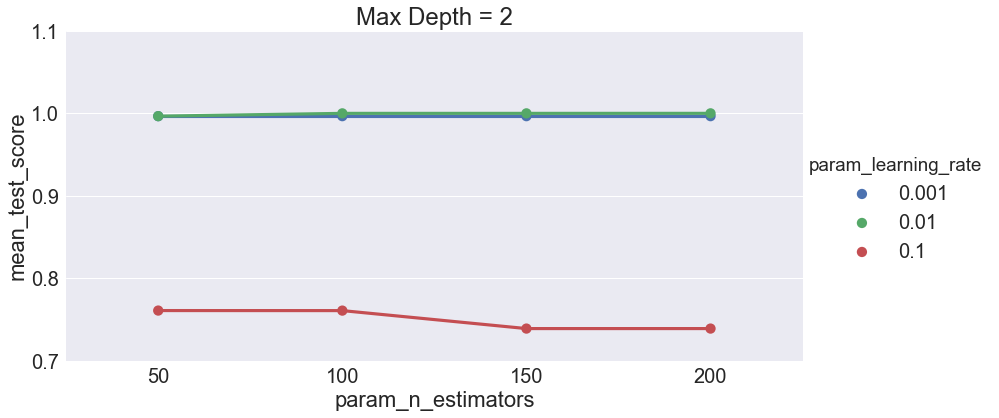

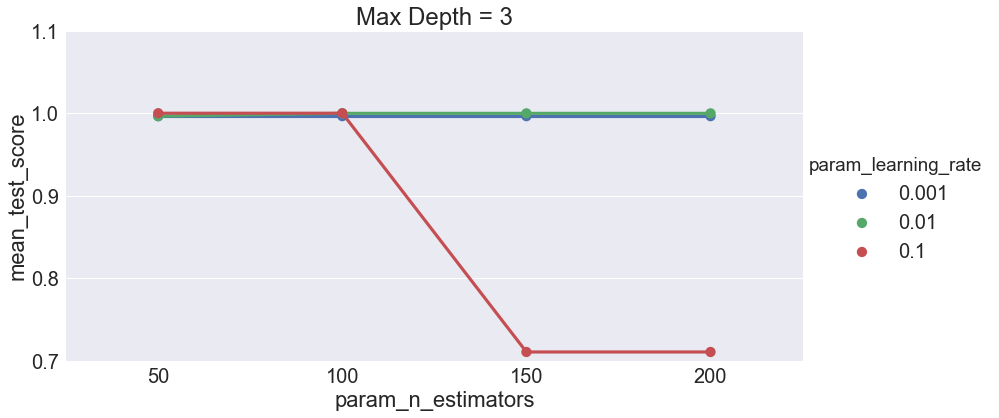

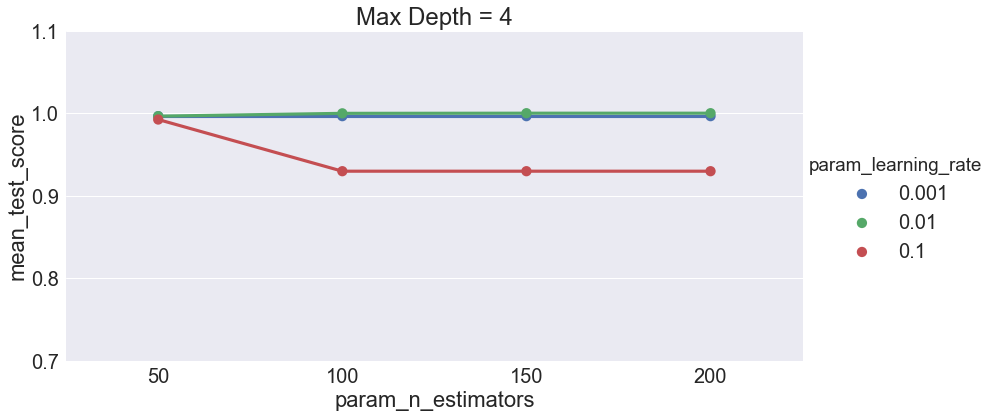

In [141]:
cv_results = pd.DataFrame(grid_CV.cv_results_)

DT_min_height = cv_results[cv_results['param_max_depth']==2]
DT_med_height = cv_results[cv_results['param_max_depth']==3]
DT_max_height = cv_results[cv_results['param_max_depth']==4]

sns.set(font_scale=2)  # Set Font Size
sns.factorplot(data = DT_min_height,   x="param_n_estimators", y="mean_test_score",
               hue = 'param_learning_rate', size=6,aspect=2)
plt.title('Max Depth = 2')
plt.ylim(0.7,1.1)
plt.show()

sns.factorplot(data = DT_med_height,   x="param_n_estimators", y="mean_test_score",
               hue = 'param_learning_rate', size=6,aspect=2)
plt.title('Max Depth = 3')
plt.ylim(0.7,1.1)
plt.show()

sns.factorplot(data = DT_max_height,   x="param_n_estimators", y="mean_test_score",
               hue = 'param_learning_rate', size=6,aspect=2)
plt.title('Max Depth = 4')
plt.ylim(0.7,1.1)
plt.show()


### Analyze Final Model for OverFitting

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=4,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0,
              n_estimators=200, presort='auto', random_state=123456,
              subsample=0.8, verbose=1, warm_start=False)


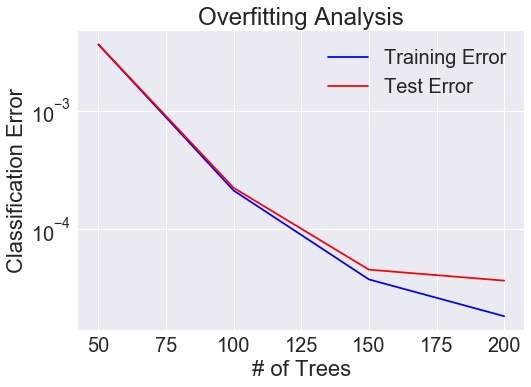

In [140]:
print(grid_CV.best_estimator_)

train_x_ = cv_results[(cv_results['param_learning_rate']==0.01) &
           (cv_results['param_max_depth'] ==4)]['param_n_estimators'].values

train_y = train_x=cv_results[(cv_results['param_learning_rate']==0.01) &
           (cv_results['param_max_depth'] ==4)]['mean_train_score'].values



test_x = cv_results[(cv_results['param_learning_rate']==0.01) &
           (cv_results['param_max_depth'] ==4)]['param_n_estimators'].values

test_y = train_x=cv_results[(cv_results['param_learning_rate']==0.01) &
           (cv_results['param_max_depth'] ==4)]['mean_test_score'].values


plt.plot(train_x_,1-train_y,color = 'blue',label='Training Error')
plt.plot(test_x,1-test_y,color = 'red',label = 'Test Error')
plt.legend()
plt.yscale('log')
plt.xlabel('# of Trees')
plt.ylabel('Classification Error')
plt.title('Overfitting Analysis')
